In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import RidgeCV, LinearRegression, LassoCV
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
############################## drop ID column #######################
ID = test['Id']
test.drop('Id', axis = 1, inplace = True)
train.drop('Id', axis = 1, inplace = True)

#####################################all_data##########################
all_data = pd.concat((train, test)).reset_index(drop = True)

# Any results you write to the current directory are saved as output.

In [3]:
sum(train['Condition2'] == train['Condition2'].mode()[0])
print("amit")

amit


In [4]:
print(train.shape)
train.head()
297 in train.index

(1460, 80)


True

In [5]:
print(test.shape)
test.head()

(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


> ## Numerical Features

In [6]:
numeric_features = list(test.select_dtypes(exclude=["object",'category']).columns)
numeric_features_num = len(numeric_features)
print("no of numerical feature: ",numeric_features_num,"\nNumerical Features: ",
      numeric_features)

no of numerical feature:  36 
Numerical Features:  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [7]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
pd.options.display.max_columns = 45
test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Categorical Features

In [9]:
category_feature = list(test.select_dtypes(exclude=[np.number]).columns)
category_feature_num = len(category_feature)
print("no. of categorical feature: ",category_feature_num,"\nCategorical Features: ", category_feature)

no. of categorical feature:  43 
Categorical Features:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [10]:
train.describe(include = ['O'])              #Shows Categorical Features

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [11]:
test.describe(include = ['O'])               #Shows Categorical Features

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1459,107,1459,1459,1457,1459,1459,1459,1459,1459,1459,1459,1459,1459,1458,1458,1443,1459,1459,1459,1415,1414,1415,1417,1417,1459,1459,1459,1459,1458,1457,729,1383,1381,1381,1381,1459,3,290,51,1458,1459
unique,5,2,2,4,4,1,5,3,25,9,5,5,7,6,4,13,15,4,4,5,6,4,4,4,6,6,4,5,2,4,4,7,5,6,3,4,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1114,1453,70,934,1311,1457,1081,1396,218,1251,1444,1205,745,1169,1442,510,510,878,892,1256,661,634,1295,951,431,1237,1446,752,1358,1337,757,1357,364,853,625,1293,1328,1301,2,172,46,1258,1204


##  Saleprice

In [12]:
train["SalePrice"].describe()
SP = train["SalePrice"]
print(train['SalePrice'].iloc[297])

239000


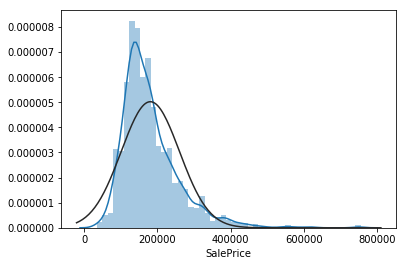

In [14]:
import scipy.stats as st
sns.distplot(train["SalePrice"], kde=True, fit=st.norm)

looking on the graph we can conclude that SalePrice is not normally distributed.

In [13]:
print(train["SalePrice"].skew())
print(train["SalePrice"].kurt())

1.88287575977
6.53628186006


Positive skewness indicates that SalePrice is skewed to right.


### What effect does it have on our prediction if SalePrice is not normally distributed and is skewed?
We will come to this point later. But now we should see what are the assumptions in Regression(Considering Ridge and lasso).
1. Dependent variable(SalePrice) should be approximately normally distributed. And henceforth should not be skewed.
2. residual error should be normally distributed. Plotting a graph of residual error vs our prediction gives us a idea about if residual is normally distributed and remedy steps we should take if it is not.



## Some numerical features are categorical. So we would type convert them to categorical.
Let's plot there scatter plot to see who are those numeric features.

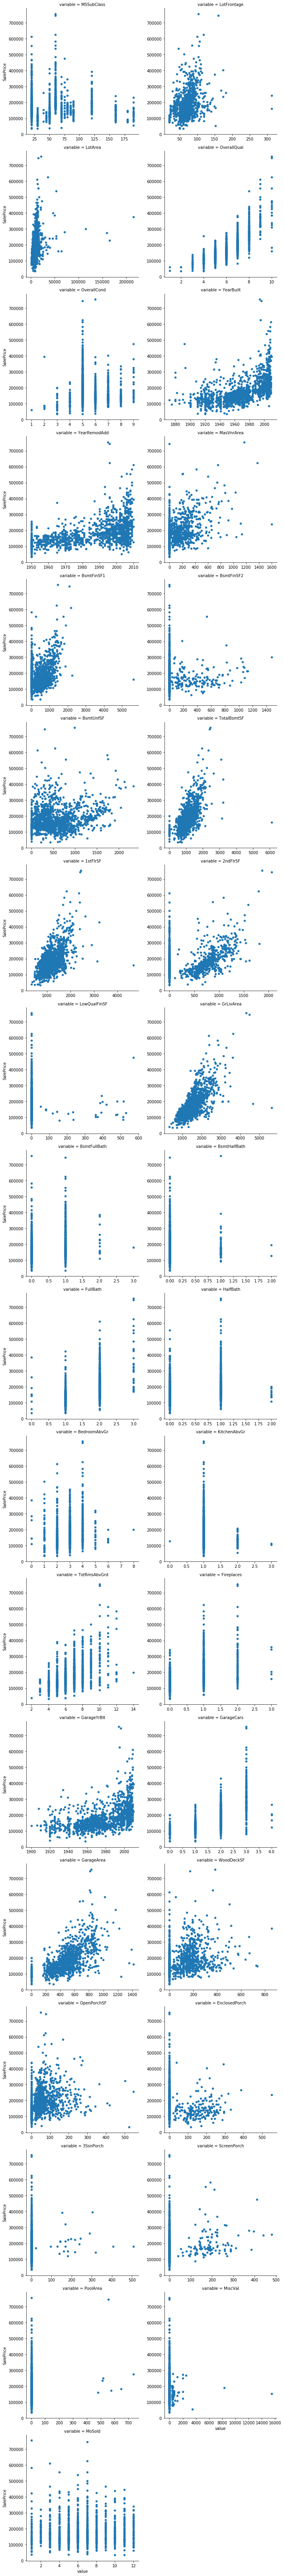

In [14]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts.plot.scatter('time', 'val',ax=ax)
f = pd.melt(train, id_vars=["SalePrice"], value_vars=numeric_features[:-1])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False,size=5 )
g = g.map(pairplot, "value", "SalePrice")

In [15]:
from IPython.display import display, HTML
pd.options.display.max_rows = 10
pd.options.display.max_columns = 90
display(train)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,

In [16]:
#Converting MoSold,MSSubClass to categorical feature
num_to_cat = ['MSSubClass', "MoSold"]
for col in num_to_cat:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')
    numeric_features.remove(col)
    category_feature.append(col)

## Correlation between variables
  We will see the corealation between numeric features and SalePrice

(35, 35)

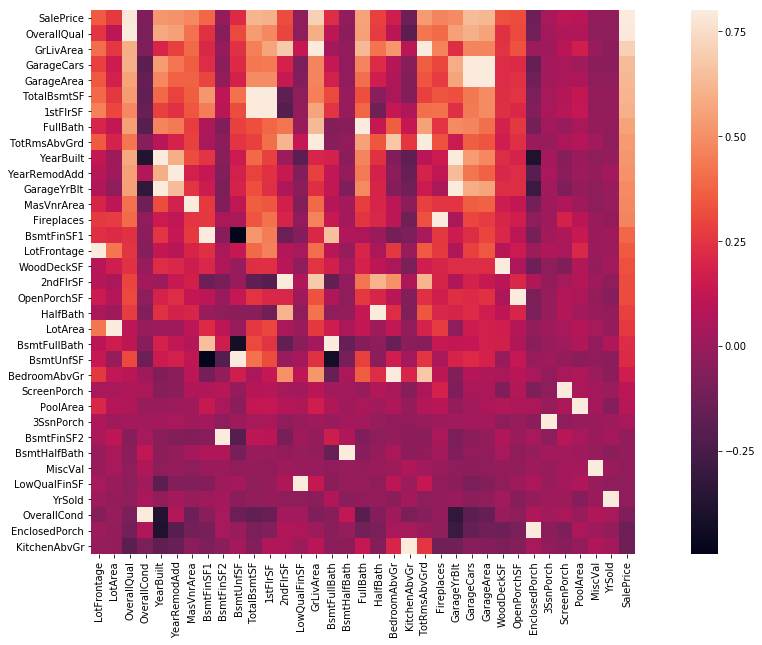

In [17]:
pd.options.display.max_rows = 45
pd.options.display.max_columns = 45
corrmat = train.corr()
corrmat.sort_values("SalePrice",inplace = True, ascending= False)
# print(sorted(list(corrmat["SalePrice"].values)))
plt.figure(figsize=(20,10))
sns.heatmap(corrmat, vmax=.8, square=True );
display(corrmat.shape)

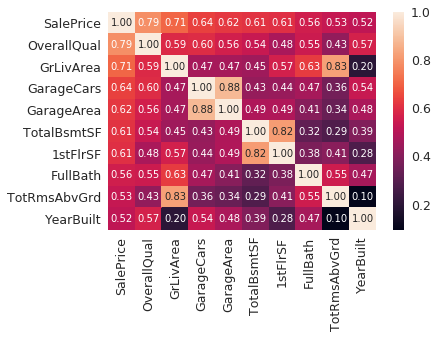

In [18]:
# We will take top 10 most correlated components
#https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
k= 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=False, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



   1. TotRmsAbvGrd and GrLivArea are significantly correlated so we will only have GrLivArea(Pending FullBath)
   2. GarageCars and GarageArea are highly corelated with each other. So we will only reatain GarageArea. Also GarageYrBlt is highy correlated to GarageArea but I won't drop it as what is the GarageArea have to take with GarageYrBlt also drop is.
   3. TotalBsmtSF and 1stFlrSF are highly correlated so we will drop 1stFlrSF
   4. Pending correlation between YearRemoteAdd and YearBuilt
So now our top components having high corelation with SalePrice are: , GrLivArea, GarageCars, TotalBsmtSF, FullBath, YearBuilt, YearRemodAdd


In [19]:
len(train.columns)

80

In [20]:
# droping TotRmsAbvGrd, 1stFlrSF,  and GarageCars
drop = ['3SsnPorch', 'MiscVal','PoolArea',"TotRmsAbvGrd", "1stFlrSF", "GarageCars","GarageQual",
        'ScreenPorch']
train.drop(drop, axis = 1, inplace = True)
test.drop(drop, axis = 1, inplace = True)
len(train.columns)
numeric_features = [i for i in numeric_features if i not in drop]
category_feature = [i for i in category_feature if i not in drop]

## Dropping Categorical Data with very low variance
Idea is adopted from the
notebook of PhilipBall, Link to the notebook is given here
[Notebook](https://www.kaggle.com/fiorenza2/journey-to-the-top-10)

In [21]:
cat_lowVar = [col for col in category_feature if sum(train[col] == train[col].mode()[0])/len(train) > 0.94]
cat_lowVar

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating']

In [22]:
train.drop(cat_lowVar, axis = 1, inplace = True)
test.drop(cat_lowVar, axis = 1, inplace = True)
category_feature = [i for i in category_feature if i not in cat_lowVar]

## Removing Outliars(numerical features)
   **Numerical feature having outliars are**:
             1. GrLivArea -> 4
             2. TotalBsmtSF -> 1
             3. LotFrontage ->2
             4. MasVnrArea ->1
             5. BsmtFinSF1 ->1

In [23]:
#Removing OutLiars:
#GrLivArea
temp = train["GrLivArea"]>4000
train.drop((temp[temp == True].index), axis = 0, inplace = True)
#TotalBsmtSF
temp = train["TotalBsmtSF"]>4000
train.drop((temp[temp == True].index), axis = 0, inplace = True)
#LotFrontage
temp = train["LotFrontage"]>300
train.drop((temp[temp == True].index), axis = 0, inplace = True)
#MasVnrArea
temp = train["MasVnrArea"]>1500
train.drop((temp[temp == True].index), axis = 0, inplace = True)
#BsmtFinSF
temp = train["BsmtFinSF1"]>5000
train.drop((temp[temp == True].index), axis = 0, inplace = True)

In [24]:
train.drop(train.index[train['SalePrice']>500000], axis = 0, inplace = True)

In [25]:
print(297 in train.index)

False


## Box-Plot some numerical features which have discrete values

In [26]:
# box_feature= ["YrSold", "Fireplaces", "KitchenAbvGr", "FullBath", "HalfBath", "BsmtFullBath",
#              "BsmtHalfBath", "MSSubClass","OverallQual", "OverallCond", "MoSold"]
# train_temp = train.copy()
# for col in box_feature:
#     train[col] = train[col].astype(str)
# def boxplot(x, y, **kwargs):
#     sns.boxplot(x=x, y=y)
#     x=plt.xticks(rotation=90)
# f = pd.melt(train_temp, id_vars=['SalePrice'], value_vars=box_feature)
# g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
# g = g.map(boxplot, "value", "SalePrice")

# del train_temp

In [ ]:
#print numeric and categorical feature again
numeric_features_num = len(numeric_features)
category_feature_num = len(category_feature)
print("No of numeric Features: ",numeric_features_num,"\n", numeric_features)
print("No of Categorical Features: ",category_feature_num,"\n", category_feature)

No of numeric Features:  27 
 ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'YrSold']
No of Categorical Features:  38 
 ['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass', 'MoSold']


## Box Plot of categorical data

In [ ]:
# for col in box_feature:
#     train[col] = train[col].astype(str)
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['SalePrice'], value_vars=category_feature)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

### REMOVE OUTLIERS IN CATEGORICAL DATA

In [ ]:
#MSZONING

#Alley
display(train.shape)
temp = train["Alley"].notnull()
temp = temp[temp == True].index
temp = train.loc[temp]["SalePrice"]>250000
train.drop((temp[temp == True].index), axis = 0, inplace = True)
display(train.shape)



## Missing Data
### 1. Numerical

In [ ]:
print("Training Data: ",train.shape)
missing_num = train[numeric_features].isnull().sum()
missing_num = missing_num[missing_num>0]
missing_num.sort_values(inplace = True, ascending = False)
missing_num = pd.DataFrame({"missing":missing_num})
display(missing_num)
missing_num1 = test[numeric_features].isnull().sum()
missing_num1 = missing_num1[missing_num1>0]
missing_num1.sort_values(inplace=True,ascending=False)
missing_num1 = pd.DataFrame({"missing": missing_num1})
print("Test Data: ",test.shape)
display(missing_num1)

### Train Data: Replace Nan in Lot Frontage and MasVnrArea with their mean value GarageYrBlt with mode.
### Test Data: Replace missing data with their mean, except in 'BsmtHalfBath' and 'BsmtFullBath', these have discrete value hence replace with mode().
            

In [ ]:
pd.options.display.max_rows = 1400
pd.options.display.max_columns = 70
train.fillna({'LotFrontage':train['LotFrontage'].mean(),
              'MasVnrArea':train['MasVnrArea'].mean(), 'GarageYrBlt':
             train['GarageYrBlt'].mode().values[0]}, inplace = True )
test.fillna({'BsmtHalfBath':test['BsmtHalfBath'].mode()[0], 
             'BsmtFullBath':test['BsmtFullBath'].mode()[0],'GarageYrBlt':
             test['GarageYrBlt'].mode()[0]},inplace = True)
test.fillna(test[missing_num1.index].mean(), inplace = True)

print(test[numeric_features[:-1]].isnull().any().any())
print(train[numeric_features[:-1]].isnull().any().any())


### 2. Categorical


In [ ]:
missing_cat = train[category_feature].isnull().sum()
missing_cat = missing_cat[missing_cat>0]
missing_cat.sort_values(inplace=True,ascending=False)
missing_cat = pd.DataFrame({"missing": missing_cat})
print("Training Data: ")
display(missing_cat)
# train[missing_cat.index] = train[missing_cat.index].astype('category')
for col in category_feature:
    train[col] = train[col].astype('category')
# print(train[missing.index])
missing_cat1 = test[category_feature[:-1]].isnull().sum()
missing_cat1 = missing_cat1[missing_cat1>0]
missing_cat1.sort_values(inplace=True,ascending=False)
missing_cat1 = pd.DataFrame({"missing": missing_cat1})
print("\nTest Data: ")
display(missing_cat1)

for col in category_feature:
    test[col] = test[col].astype('category')
# missing_electrical = train[train["Electrical"].isnull()].index.tolist()
# print(missing_electrical)

1. GarageCond, GarageQual, Garagefinish, GarageType should be filled as none because whenever value is none corresponding GarageArea is 0 means no garage is available
2. BsmtCond, BsmtQual, BsmtExposure, BsmtFinType2, BsmtFinType1
- BsmtExposure NaN value should be filled with "N0"
3. NaN value of fence means no fence
4. FireplaceQU, NaN value should be filled with none because corresponding number of places 
5. MasVnrType should be filled none because corresponding MasvnrArea is 0
6. I don't have any idea about electrical. So I will remove the row containing missing data

In [ ]:
train['BsmtExposure'].fillna('No', inplace = True)
test['BsmtExposure'].fillna('No', inplace = True)
print(train['BsmtExposure'].isnull().any().any())
for col in missing_cat.index:
    train[col].cat.add_categories("none", inplace = True)
    train[col].fillna("none", inplace = True)
train.drop(train.index[1379], inplace = True)

train['BsmtExposure'].cat.remove_unused_categories(inplace = True)  #"none" is unused category
print(train['BsmtExposure'].isnull().any().any())
#Filling missing data in test
temp = list(missing_cat.index)
temp = temp[:-1]
for col in temp:
    test[col].cat.add_categories("none", inplace = True)
    test[col].fillna("none", inplace = True)
test['BsmtExposure'].cat.remove_unused_categories(inplace = True)
df =test[missing_cat1.index].mode()
df1 = pd.Series(list(df.values[0,:]), index = df.columns)
test.fillna(df1, inplace = True)


print(test.isnull().any().any())
print(train.isnull().any().any())

In [ ]:
print(train.shape)
print(test.shape)

In [ ]:
col_skew = (train[numeric_features].skew()[train.skew()>2]).index
col_skew

In [ ]:
# display(test['MasVnrArea'].min())
# for col in col_skew:
#     train[col] = np.log1p(train[col])
#     test[col] = np.log1p(test[col])

## Encoding Categorical Variable
### 1.Training Data
** Fisr Let's print various categories and divide them in nominal and ordinal variable**

In [ ]:
for col in category_feature:
    print(col)
    print(train[col].cat.categories)

**Ordinal Variables**: PoolQC, FireplaceQu, GarageCond, GarageQual, BsmtExposure, BsmtCond, BsmtQual, ExterQual,
                                      ExterCond, HeatingQC, KitchenQual, *MSSubClass, MoSold*

In [ ]:
ord_cat = ["PoolQC", "FireplaceQu", 'BsmtCond', 'GarageCond', 
           'BsmtQual', 'ExterQual','ExterCond', 'HeatingQC', 'KitchenQual']
dic_num = {'none': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
#, 'GarageCond', 'GarageQual'

In [ ]:
#BsmtExposure has categories: Av, Gd, Mn, No 
# train['BsmtExposure'].replace({'No':0,'Av':1,'Gd':2,'Mn':3},inplace = True)
cat1 = list(train['MSSubClass'].cat.categories)
d1 = dict(zip(cat1, np.arange(1,len(cat1)+1)))
print(d1)
train.replace({'MSSubClass': d1}, inplace = True)
for col in ord_cat:
    train[col].replace(dic_num, inplace = True)
    train[col] = train[col].astype('float64')

In [ ]:
pd.options.display.max_columns = 70
print((train.select_dtypes(include= ['category']).columns))

## 2. Test Data(Encoding Categorical Variable)

In [ ]:
for col in category_feature:
    print(col)
    print(test[col].cat.categories)

**Ordinal Variable**: ExterQual, ExterCond, BsmtQual, BsmtExposure, BsmtCond,  HeatingQC, FireplaceQu, GarageQual, GarageCond, PoolQC, MSSubClass, MoSold

In [ ]:
ord_cat1 = ['ExterQual', 'ExterCond', 'BsmtQual', 'GarageCond', 'BsmtCond', 'HeatingQC', 
           'FireplaceQu', 'PoolQC','KitchenQual']
#'GarageQual', 'GarageCond'

In [ ]:
#BsmtExposure has categories: Av, Gd, Mn, No 
# print(test['BsmtExposure'].head())
# test['BsmtExposure'].replace({'No':0,'Av':1,'Gd':2,'Mn':3}, inplace = True)
# test['BsmtExposure'] = test['BsmtExposure'].astype('float64')
cat1 = list(test['MSSubClass'].cat.categories)
d1 = dict(zip(cat1, np.arange(1,len(cat1)+1)))
test.replace({'MSSubClass': d1}, inplace = True)
for col in ord_cat1:
    test[col].replace(dic_num, inplace = True)
    test[col] = test[col].astype('float64')
# print(test['BsmtExposure'].head())

In [ ]:
numeric_features = test.select_dtypes(exclude=['O','category']).columns
# print(numeric_features)
display(train['ExterQual'].head())
test['ExterQual'] = test['ExterQual'].astype('float64')
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
#     print(val)
    ts.plot.scatter('time', 'val',ax=ax)
f = pd.melt(train, id_vars=["SalePrice"], value_vars=numeric_features[:-1])
# print(f)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False,size=5 )
g = g.map(pairplot, "value", "SalePrice")

In [ ]:
pd.options.display.max_columns = 90
SP = train.pop('SalePrice')
# SP.index = np.arange(len(SP))
print(SP.isnull().any())
print(train.shape)
test.shape

In [ ]:
all_data = pd.concat([train, test])
print(all_data.shape)
print(all_data['Alley'].cat.categories)
all_data['Alley'].replace({"none":0, "Grvl":1, "Pave":2}, inplace = True)
all_data['Alley'] = all_data["Alley"].astype('float64')
all_data["Alley_sq"] = all_data['Alley']**2
######Droping Columns and experimenting######
all_data.drop("PoolQC", axis = 1, inplace =True)
# all_data["GarageCond"] = all_data["GarageCond"].astype('category')
############################################
# all_data = all_data.sample(frac=1).reset_index(drop=True)
all_data = pd.get_dummies(all_data)
pd.options.display.max_columns = 300
# print(all_data.head())
all_data['OverallQual_sq'] = all_data['OverallQual']**2
all_data['OverallQual_cb'] = all_data['OverallQual']**3
all_data['OverallQualCond'] = all_data['OverallQual']*all_data['OverallCond']
all_data['TotalBsmtSF_cb'] = all_data['TotalBsmtSF']**2
all_data['GarageArea_cb'] = all_data['GarageArea']**3
all_data['KitchenQual_sq'] = all_data['KitchenQual']**2
all_data['KitchenQual_cb'] = all_data['KitchenQual']**3
all_data['FireplaceQu_sq'] = all_data['FireplaceQu']**2
all_data['BsmtQual_sq'] = all_data['BsmtQual']**2
all_data['BsmtQual_cb'] = all_data['BsmtQual']**3
# all_data['BsmtQualCond'] = all_data['BsmtQual']*all_data['BsmtCond']
all_data['GarageAreaCond'] = all_data['GarageArea']*all_data['GarageCond']
all_data['GrLivArea_sq'] = all_data['GrLivArea']**2
all_data['GrLivArea_cb'] = all_data['GrLivArea']**3
train1 = all_data.iloc[:1444,:]
train1['SalePrice'] = SP
# print(train1['SalePrice'].isnull().any())
# train1 = train1.sample(frac=1).reset_index(drop=True)
display(train1['SalePrice'])#
SP = train1.pop('SalePrice')
test1 = all_data.iloc[1444:,:]

In [ ]:
display(train1.shape)
print(test1.shape)

In [ ]:

x_test = train1.values[1022:,:]
y_test = SP.values[1022:]

In [ ]:
import numpy as np
def rmsle(predicted, actual):
    assert(len(predicted) == len(actual))
    p = np.log(np.array(predicted) + 1)
    a = np.log(np.array(actual) + 1)
    return (((p - a)**2).sum() / len(predicted))**0.5

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
it = [200, 300, 400,500, 600, 700, 800, 900, 1000, 1022]
J1,J2 = [],[]
for iteration in it:
    lr = LinearRegression()
    lr.fit(train1.values[:iteration,:], SP.values[:iteration])
    print(iteration)
    score1 = lr.score(train1.values[:iteration,:], SP.values[:iteration])
    score2 = lr.score(x_test, y_test)
    J1.append(1-score1)
    J2.append(1-score2)
    print(1-score1, 1-score2)
    
plt.plot(J1,'b-',label="J_train")
plt.plot(J2,'r-',label="J_test")
# plt.label()
plt.show()
y_pred1 = lr.predict(x_test)
error = rmsle(y_pred1, y_test)
print(error)
y_pred = lr.predict(test1.values)
y_pred[y_pred<0] = 150000
sub1 = pd.DataFrame()
sub1['Id']=ID
sub1['SalePrice']=y_pred
sub1.to_csv("prediction_LRegr.csv",index=False)

In [ ]:
(lr.coef_[lr.coef_<0]).shape

In [ ]:
import numpy as np
def rmsle(predicted, actual):
    assert(len(predicted) == len(actual))
    p = np.log(np.array(predicted) + 1)
    a = np.log(np.array(actual) + 1)
    return (((p - a)**2).sum() / len(predicted))**0.5

from sklearn.linear_model import Lasso
lr =Lasso(0.3)
it = [200, 300, 400,500, 600, 700, 800, 900, 950,1000, 1022,1444]
J1,J2 = [],[]
# alpha =[1,10,100,140,200,1000]
alpha = [100]
for al in alpha:
    print(al)
    J1,J2= [],[]
    for iteration in it:
        lr = Lasso(al, max_iter= 10000)
        lr.fit(train1.values[:iteration,:], SP.values[:iteration])
        print(iteration)
        score1 = lr.score(train1.values[:iteration,:], SP.values[:iteration])
        score2 = lr.score(x_test, y_test)
#         y_pred1 = lr.predict(train1.values[:iteration,:])
#         score1 = rmsle(y_pred1, SP.values[:iteration])
#         y_pred1 = lr.predict(x_test)
#         score2 = rmsle(y_pred1, y_test)
        J1.append(1-score1)
        J2.append(1-score2)
        print(1-score1, 1-score2)
    
    plt.plot(J1,'b-',label="J_train")
    plt.plot(J2,'r-',label="J_test")
    # plt.label()
    plt.show()
    y_pred1 = lr.predict(x_test)
    error = rmsle(y_pred1, y_test)
    print(error)
y_pred = lr.predict(test1.values)
y_pred[y_pred<0] = 150000
sub1 = pd.DataFrame()
sub1['Id']=ID
sub1['SalePrice']=y_pred
sub1.to_csv("prediction_LRegr1.csv",index=False)

In [ ]:

(lr.coef_[lr.coef_ < 0.01]).shape

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
def rmsle(predicted, actual):
    assert(len(predicted) == len(actual))
    p = np.log(np.array(predicted) + 1)
    a = np.log(np.array(actual) + 1)
    return (((p - a)**2).sum() / len(predicted))**0.5

regr = RandomForestRegressor()
it = [200, 300, 400,500, 600, 700, 800, 900, 950,1000, 1022,1444]
J1,J2 = [],[]
# alpha =[1,10,100,140,200,1000]
alpha = [100]
for al in alpha:
    print(al)
    J1,J2= [],[]
    for iteration in it:
        regr = RandomForestRegressor()
        regr.fit(train1.values[:iteration,:], SP.values[:iteration])
        print(iteration)
        score1 = lr.score(train1.values[:iteration,:], SP.values[:iteration])
        score2 = lr.score(x_test, y_test)
#         y_pred1 = lr.predict(train1.values[:iteration,:])
#         score1 = rmsle(y_pred1, SP.values[:iteration])
#         y_pred1 = lr.predict(x_test)
#         score2 = rmsle(y_pred1, y_test)
        J1.append(1-score1)
        J2.append(1-score2)
        print(1-score1, 1-score2)
    
    plt.plot(J1,'b-',label="J_train")
    plt.plot(J2,'r-',label="J_test")
    # plt.label()
    plt.show()
    y_pred1 = regr.predict(x_test)
    error = rmsle(y_pred1, y_test)
    print(error)
y_pred = regr.predict(test1.values)
y_pred[y_pred<0] = 150000
sub1 = pd.DataFrame()
sub1['Id']=ID
sub1['SalePrice']=y_pred
sub1.to_csv("prediction_LRegr1.csv",index=False)